In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
df=pd.read_excel('IPL.xlsx')

In [46]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [47]:
df.shape

(76014, 15)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mid             76014 non-null  int64         
 1   date            76014 non-null  datetime64[ns]
 2   venue           76014 non-null  object        
 3   bat_team        76014 non-null  object        
 4   bowl_team       76014 non-null  object        
 5   batsman         76014 non-null  object        
 6   bowler          76014 non-null  object        
 7   runs            76014 non-null  int64         
 8   wickets         76014 non-null  int64         
 9   overs           76014 non-null  float64       
 10  runs_last_5     76014 non-null  int64         
 11  wickets_last_5  76014 non-null  int64         
 12  striker         76014 non-null  int64         
 13  non-striker     76014 non-null  int64         
 14  total           76014 non-null  int64         
dtypes:

## Cleaning

In [49]:
q=df.venue.value_counts(ascending=True)

In [50]:
l=[]
for i in q.index:
    l.append(i)

In [51]:
d={}
for i,j in enumerate(l):
    d[j]=i
d    

{'OUTsurance Oval': 0,
 'De Beers Diamond Oval': 1,
 'Vidarbha Cricket Association Stadium, Jamtha': 2,
 'Buffalo Park': 3,
 'Green Park': 4,
 'Nehru Stadium': 5,
 'Holkar Cricket Stadium': 6,
 'Newlands': 7,
 'Shaheed Veer Narayan Singh International Stadium': 8,
 'Sharjah Cricket Stadium': 9,
 'Sheikh Zayed Stadium': 10,
 'JSCA International Stadium Complex': 11,
 'Barabati Stadium': 12,
 'Dubai International Cricket Stadium': 13,
 "St George's Park": 14,
 'New Wanderers Stadium': 15,
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 16,
 'Himachal Pradesh Cricket Association Stadium': 17,
 'Saurashtra Cricket Association Stadium': 18,
 'Punjab Cricket Association IS Bindra Stadium, Mohali': 19,
 'SuperSport Park': 20,
 'Brabourne Stadium': 21,
 'Sardar Patel Stadium, Motera': 22,
 'Kingsmead': 23,
 'Maharashtra Cricket Association Stadium': 24,
 'Subrata Roy Sahara Stadium': 25,
 'Dr DY Patil Sports Academy': 26,
 'Sawai Mansingh Stadium': 27,
 'Punjab Cricket Association Stad

In [9]:

# df['venue']=np.where(df['venue'].isin(l),df['venue'],'Other')

In [53]:
for i in range(df.shape[0]):
    df['venue'][i]=d[df['venue'][i]]

<ipython-input-53-556267b23a3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['venue'][i]=d[df['venue'][i]]


In [54]:
df['venue'].value_counts()

34    7443
33    7068
32    7049
31    7048
30    5972
29    5827
28    4247
27    4110
26    2088
25    2086
24    1843
23    1731
22    1484
21    1380
20    1377
19    1342
18    1229
17    1115
16    1113
15     995
14     870
13     868
12     856
11     837
10     836
9      744
8      742
7      737
6      617
5      499
4      492
3      380
2      370
1      368
0      251
Name: venue, dtype: int64

In [55]:
for i in range(df.shape[0]):
    df['date'][i]=int(str(df['date'][i])[:4])

<ipython-input-55-571e64a2a8b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][i]=int(str(df['date'][i])[:4])
c:\users\harsha\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [56]:
# int(str(df['date'][1])[:4])
df['date'].value_counts()

2013    9316
2012    9096
2011    8493
2010    7491
2014    7253
2017    7152
2016    6922
2008    6868
2015    6714
2009    6709
Name: date, dtype: int64

In [57]:
df.drop(['mid','batsman','bowler','striker','non-striker'],axis=1,inplace=True)
df.columns

Index(['date', 'venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [58]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [59]:
team=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']
df=df[(df['bat_team'].isin(team)) & (df['bowl_team'].isin(team))]
df.shape

(53811, 10)

In [60]:
df = df[df['overs']>=5.0]

In [61]:
df.shape

(40108, 10)

## Analysis

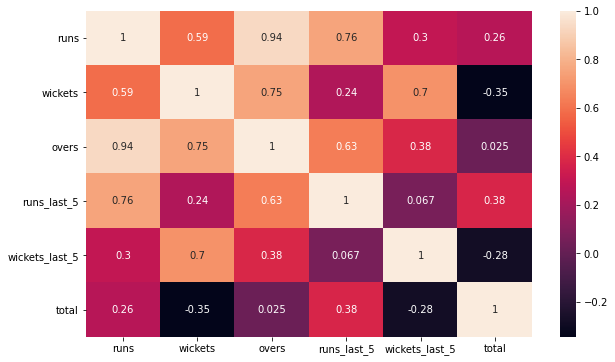

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

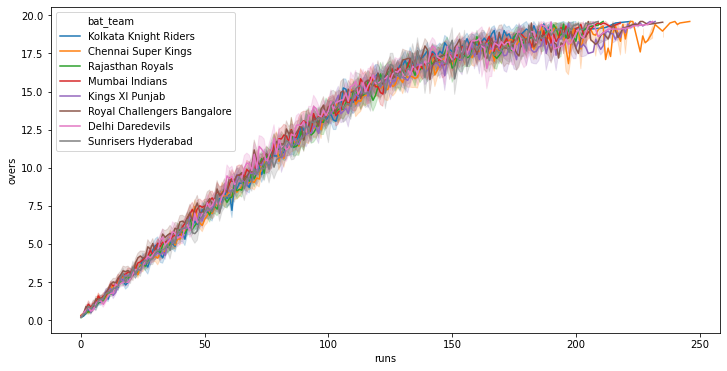

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(x='runs',y='overs',data=df,hue='bat_team')

In [21]:
df.date.max()

2017

In [62]:
newdf=pd.get_dummies(df,columns=['bat_team','bowl_team'])

In [67]:
newdf.columns

Index(['date', 'venue', 'runs', 'wickets', 'overs', 'runs_last_5',
       'wickets_last_5', 'total', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [65]:
newdf.to_excel('clean_IPL.xlsx',index=False)